In [1]:
import os
os.chdir("../../")
from PotentialFlowSolver import *

Libraries fetched!...



In [2]:
kwargs = {"ylim":[-4,4], "V_inf": 10, "g_div": 100, "write":True,
           "n_airfoil": 50,
           "n_fs": 20,
           "n_bed": 20,
           "n_inlet": 10,
           "n_outlet": 10}
model = PotentialFlowSolver("0012", alpha = -17.2794, P=3, kwargs = kwargs)

In [3]:
model.solve()

[0.97417847 0.14570729]
[0.97315977 0.14898211]
11139
Starting iteration 0
11139
	 dGamma: 0.2567098391157774
	 Iteration time: 1.3667044639587402 seconds

Starting iteration 1
11139
	 dGamma: -0.00653070106443604
	 Iteration time: 0.5594441890716553 seconds

Starting iteration 2
11139
	 dGamma: 11.039921584512992
	 Iteration time: 0.6275503635406494 seconds

Starting iteration 3
11139
	 dGamma: -12.325779862396772
	 Iteration time: 0.5432226657867432 seconds

Starting iteration 4
11139
	 dGamma: 0.5652627071957506
	 Iteration time: 0.5433266162872314 seconds

Starting iteration 5
11139
	 dGamma: 0.06901618724968861
	 Iteration time: 0.600078821182251 seconds

Starting iteration 6
11139
	 dGamma: 0.4137949185029331
	 Iteration time: 0.6322276592254639 seconds

Starting iteration 7
11139
	 dGamma: 0.002727266059118825
	 Iteration time: 0.5563523769378662 seconds

Starting iteration 8
11139
	 dGamma: -0.10261351286859638
	 Iteration time: 0.5504701137542725 seconds

Starting iteration 9


In [4]:
nasa_9mil_10AoA = np.array([
    [.9483 ,  .1147],
    [.9000 ,  .0684],
    [.8503 ,  .0882],
    [.7998 ,  .0849],
    [.7497 ,  .0782],
    [.7003 ,  .0739],
    [.6502 ,  .0685],
    [.5997 ,  .0813],
    [.5506 ,  .0884],
    [.5000 ,  .0940],
    [.4503 ,  .1125],
    [.4000 ,  .1225],
    [.3507 ,  .1488],
    [.3002 ,  .1893],
    [.2501 ,  .2292],
    [.2004 ,  .2973],
    [.1504 ,  .3900],
    [.1000 ,  .5435],
    [.0755 ,  .6563],
    [.0510 ,  .8031],
    [.0251 , 1.0081],
    [.0122 , 1.0241],
    [0.    ,-2.6598],
    [.0135 ,-3.9314],
    [.0271 ,-3.1386],
    [.0515 ,-2.4889],
    [.0763 ,-2.0671],
    [.1012 ,-1.8066],
    [.1503 ,-1.4381],
    [.1994 ,-1.2297],
    [.2501 ,-1.0638],
    [.2999 , -.9300],
    [.3499 , -.8094],
    [.3994 , -.7131],
    [.4496 , -.6182],
    [.4997 , -.5374],
    [.5492 , -.4563],
    [.5994 , -.3921],
    [.6495 , -.3247],
    [.6996 , -.2636],
    [.7489 , -.1964],
    [.8003 , -.1318],
    [.8500 , -.0613],
    [.8993 , -.0021],
    [.9489 ,  .0795],
])

In [5]:
nasa =np.array([[0, -3.66423],
[0.00218341, -5.04375],
[0.00873362, -5.24068],
[0.0131004, -4.67125],
[0.0174672, -4.32079],
[0.0480349, -2.74347],
[0.0742358, -2.26115],
[0.0982533, -1.95405],
[0.124454, -1.7345],
[0.146288, -1.55884],
[0.176856, -1.36109],
[0.28821, -1.00829],
[0.320961, -0.941877],
[0.384279, -0.787206],
[0.447598, -0.654432],
[0.515284, -0.543461],
[0.576419, -0.432633],
[0.637555, -0.343703],
[0.700873, -0.254725],
[0.766376, -0.1657],
[0.831878, -0.098572],
[0.893013, -0.00964205],
[0.958515, 0.0793835],
[1, 0.124088]])


[0.97743383 0.9738389  0.96310571 0.94538889 0.92094569 0.89013456
 0.85341225 0.81132856 0.7645185  0.71369183 0.65962025 0.6031233
 0.54505382 0.48628399 0.4276928  0.37015507 0.31453199 0.26166226
 0.21235318 0.1673704  0.12742588 0.09316376 0.06514466 0.04382941
 0.02956382 0.02256617 0.02309794 0.03130186 0.04704185 0.07007934
 0.10006996 0.13656104 0.17899127 0.22669406 0.27890514 0.33477459
 0.39338284 0.45375937 0.51490282 0.57580105 0.63545008 0.69287105
 0.74712517 0.79732699 0.84265631 0.8823696  0.91581122 0.9424246
 0.96176302 0.97349934]


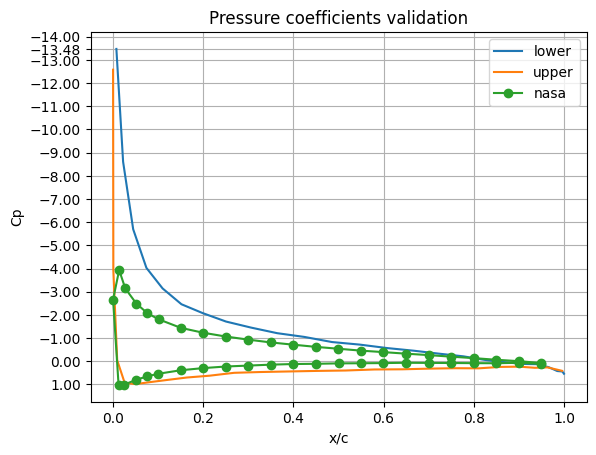

In [6]:
line_clasifier = model.mesh.cell_data_dict["gmsh:physical"]["line"]
naca_points = np.unique(model.mesh.cells_dict["line"][(line_clasifier == 5)])
print
points = model.mesh.points[naca_points][:,0]
pressure = np.array(model.pressure_coeff.at(model.mesh.points[naca_points][:,:2]))

#shortening the plot to avoid funny buisness at the trailing edge
points = points
print(points)
points -= np.min(points)
points *= 1/np.max(points)
pressure = pressure
middle = model.kwargs.get("n_airfoil")//2

plt.plot(points[:middle][::-1] ,np.flip(pressure[:middle]), label = "lower", color = "C0")
plt.plot(points[middle:] ,(pressure[middle:]), label = "upper", color = "C1")
plt.plot(nasa_9mil_10AoA[:,0], nasa_9mil_10AoA[:,1], color = "C2", label = "nasa", marker = 'o')
plt.yticks(np.hstack((np.arange(int(np.min(pressure))-1, 1.1, 1), np.min(pressure))))
plt.legend(loc = "upper right")
plt.xlabel('x/c')
plt.ylabel('Cp') 
plt.title('Pressure coefficients validation') 
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [7]:
coords = np.array([233, 234, 237, 240, 241, 244, 245, 248, 251, 254, 255, 258, 259,
       262, 263, 266, 267, 270, 271, 274, 275, 278, 281, 282, 283, 286,
       287, 290, 291, 294, 295, 296, 299, 300, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324,
       325, 326, 327, 330, 331, 332, 333, 334])

np.min(model.pressure_coeff.at(model.fd_mesh.coordinates.dat.data_ro[coords]))

np.float64(-1.0472240561074735)

In [8]:
model.fd_mesh.coordinates.dat.data_ro[[331,332]]

array([[ 0.4276928 , -0.0829772 ],
       [ 0.48628399, -0.06160384]])

In [9]:
model.Gamma

np.float64(9.832168896786687)

In [10]:
model.lift_coeff

np.float64(-1.9664337793573372)

In [11]:
model.lift

np.float64(-120.44406898563692)

In [12]:
np.min(model.pressure_coeff.dat.data)

np.float64(-13.476367660666991)

In [13]:
-4.251446823121933

-4.251446823121933